In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize

import pandas as pd
import numpy as np
from numpy import linalg as LA
import math
import matplotlib.pyplot as plt

Raw_Data = pd.read_csv('vehicles-processed.csv')


Raw_Data_temp = Raw_Data.drop(columns=['make','model','VClass','gears'])
display(Raw_Data_temp)
Raw_Data_temp = np.array(Raw_Data_temp)


# np.random.shuffle(Raw_Data_temp)
X = Raw_Data_temp[:,1:].copy()
Y = Raw_Data_temp[:,0].copy()

print(Raw_Data_temp[:][4])

# for i in range(len(X[1])):
#   X[:,i] = X[:,i] / np.linalg.norm(X[:,i])

# X_Train = X[:int(len(X)*0.66)]
# X_Test = X[int(len(X)*0.66):]

# Y_Train = Y[:int(len(X)*0.66)]
# Y_Test = Y[int(len(X)*0.66):]

,comb08,cylinders,displ,drive,year,sCharger,tCharger,gearbox
0,21,4,2.0,0,1984,0,0,0
1,22,4,1.5,0,1984,0,0,0
2,15,8,5.7,0,1984,0,0,1
3,15,8,5.7,0,1984,0,0,0
4,17,6,3.0,0,1984,0,1,1
...,...,...,...,...,...,...,...,...
28739,21,6,3.6,4,2024,0,0,1
28740,17,8,5.3,4,2024,0,0,1
28741,16,8,5.3,4,2024,0,0,1
28742,17,6,4.0,4,2024,0,0,1


[1.700e+01 6.000e+00 3.000e+00 0.000e+00 1.984e+03 0.000e+00 1.000e+00
 1.000e+00]


In [2]:
# reg = LinearRegression().fit(X_Train, Y_Train)
# Y_predict = reg.predict(X_Train)

# Titles = Raw_Data.drop(columns=['comb08','make','model','VClass','gears']).columns.tolist()
# Coefficient = pd.DataFrame(reg.coef_).T
# Coefficient.columns=Titles
# display(Coefficient)

# from sklearn.metrics import mean_squared_error
# print(mean_squared_error(Y_Train, Y_predict))

# print("\n\n")
# for i in range(10):
#   X_Value = pd.DataFrame(X_Train[i],Titles).T
#   display(X_Value)
#   print("True_Value: ",round(Y_Train[i],2),"Predicted_Value: ",round(Y_predict[i],2))
#   print()

array([1984., 1984., 1984., ..., 2024., 2024., 2024.])

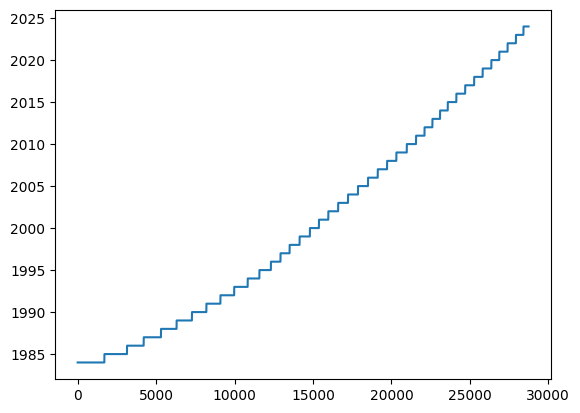

In [3]:
plt.plot(Raw_Data_temp[:,4])
Raw_Data_temp[:,4]

[  21.    4.    2.    0. 1984.    0.    0.    0.]


,cylinders,displ,drive,year,sCharger,tCharger,gearbox
0,-240.837935,-1321.894951,-361.822127,-5.778592e+10,-1.416254e+07,-154.938938,-200.883303


0.09585364213603507 0.025

[24.31508005] 24.0 

Training Started: 



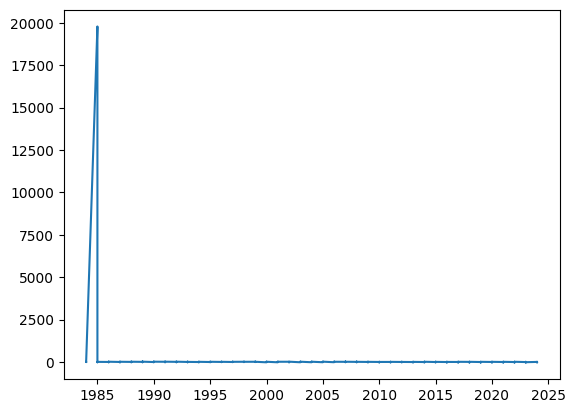

In [4]:
epsilon = 0.1
delta = 0.1

X_Size = 1000

# np.random.shuffle(Raw_Data_temp)
X = Raw_Data_temp[:,1:].copy()
Y = Raw_Data_temp[:,0].copy()

print(Raw_Data_temp[0])

X_Train2_Years = X[X_Size:-1,3].copy()

for i in range(len(X[1])):
  X[:,i] = X[:,i] / np.linalg.norm(X[:,i])

X_Train = X[:X_Size].copy()
X_Train2 = X[X_Size:-1].copy()
# X_Train2 = X[X_Size:X_Size*2].copy()


Y_Train = Y[:X_Size].copy()
Y_Train2 = Y[X_Size:-1].copy()
# Y_Train2 = Y[X_Size:X_Size*2]

reg = LinearRegression().fit(X_Train, Y_Train)

Titles = Raw_Data.drop(columns=['comb08','make','model','VClass','gears']).columns.tolist()
Coefficient = pd.DataFrame(reg.coef_).T
Coefficient.columns=Titles
display(Coefficient)


C = -1e4
Q = (epsilon**2)/(X_Size*np.sqrt(np.log(1/(epsilon*delta)))*np.log(X_Size))


alpha1 = C*Q*np.log(Q)
alpha2 = epsilon/4

print(alpha1,alpha2)
print()

print(reg.predict(X_Train2[0].reshape(1,-1)),Y_Train2[0],"\n")
print("Training Started: \n")


predict_error = []
predict_year = []
t = 0
counter = 0
while t<len(X_Train2):
  # print("\nt=",t)
  xt = X_Train2[t]
  predict_error.append(reg.predict(xt.reshape(1,-1))-Y_Train2[t])
  predict_year.append(int(X_Train2_Years[t]))
  U, S, Vh = LA.svd(np.matmul(X_Train.transpose(),X_Train), full_matrices=False)

  # q = X_Train2@U.getH()
  # q = q@LA.inv(S.getH())
  # q = q@U.getH().transpose()
  # q = q@xt

  q = xt@LA.pinv(X_Train.transpose()@X_Train)@X_Train.transpose()
  # print(np.shape(q))
  # print(xt-q@X_Train2)

  u = U.transpose()@xt

  # print("q=",LA.norm(q),alpha1,"u=",LA.norm(u),alpha2)
  # print(reg.predict(xt.reshape(1,-1))-Y_Train2[t])

  if(LA.norm(q)<= alpha1 and LA.norm(u)<= alpha2):
    Y_predict = reg.predict(xt.reshape(1,-1))
    # print(Y_predict,Y_Train2[t],"\n")
    t+=1


  else:
    Y_predict = "[Reject]"
    # print(Y_predict,Y_Train2[t],"\n")

    for i in range(10):
        yt = Y_Train2[t+i]
        X_Train = np.delete(X_Train, 0,  axis=0)
        Y_Train = np.delete(Y_Train, 0,  axis=0)  
        
        X_Train = np.append(X_Train, xt.reshape(1,-1), axis=0)
        Y_Train = np.append(Y_Train, np.array([yt]), axis=0)

    reg = LinearRegression().fit(X_Train, Y_Train)
    t+=10

  Titles = Raw_Data.drop(columns=['comb08','make','model','VClass','gears']).columns.tolist()
  Coefficient = pd.DataFrame(reg.coef_).T
  Coefficient.columns=Titles
  
  # display(Coefficient)
  
  counter+=1

predict = [predict_year,predict_error]
plt.plot(predict_year,predict_error)


,comb08,cylinders,displ,drive,year,sCharger,tCharger,gearbox
5310,21,4,2.3,2,1988,0,0,0
5311,21,4,2.3,2,1988,0,0,0
5312,18,6,3.8,2,1988,0,0,1
5313,18,6,3.8,2,1988,0,0,1
5314,13,8,5.0,4,1988,0,0,0
...,...,...,...,...,...,...,...,...
7278,13,6,3.9,2,1989,0,0,0
7279,10,8,5.9,2,1989,0,0,1
7280,18,8,5.0,2,1989,0,0,1
7281,10,6,3.0,2,1989,0,0,1


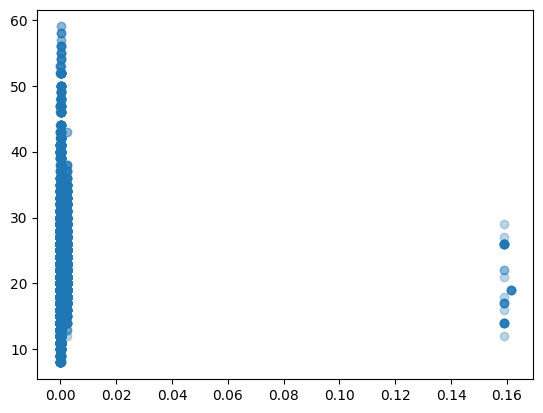

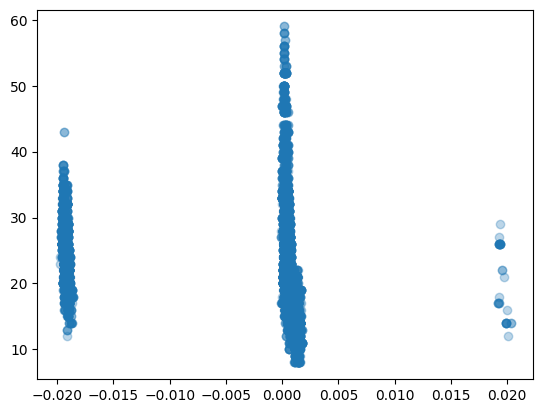

In [5]:
from sklearn.decomposition import PCA
year = 1988
Raw_Data_temp = Raw_Data.drop(columns=['make','model','VClass','gears'])
Raw = Raw_Data_temp.loc[(Raw_Data_temp['year']>=year) & (Raw_Data_temp['year']<=year+1)]

display(Raw)

Y_Train = np.array(Raw['comb08'])
X_Train = np.array(Raw.drop(columns = ['comb08']))

pca = PCA(n_components=2)
pca.fit(X)
plt.scatter(X.dot(pca.components_[0]), Y, alpha=0.3)
plt.show()

plt.scatter(X.dot(pca.components_[1]), Y, alpha=0.3)
plt.show()

Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model
Created new model


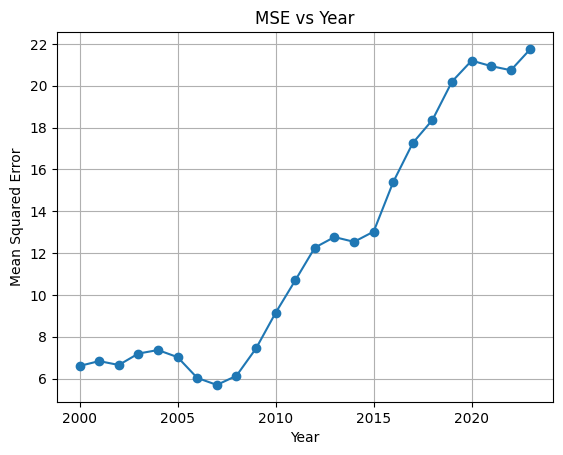

MSE trained on 2000: 6.605102245170911
MSE trained on 2001: 6.836872896503151
MSE trained on 2002: 6.650554198792616
MSE trained on 2003: 7.197248379325744
MSE trained on 2004: 7.3653731560304605
MSE trained on 2005: 7.025034879800293
MSE trained on 2006: 6.033878469990677
MSE trained on 2007: 5.6976027887636045
MSE trained on 2008: 6.133191416252068
MSE trained on 2009: 7.44126364045245
MSE trained on 2010: 9.14485728858261
MSE trained on 2011: 10.69162307745136
MSE trained on 2012: 12.261830455988676
MSE trained on 2013: 12.766457323568467
MSE trained on 2014: 12.53776550783471
MSE trained on 2015: 13.026572765470275
MSE trained on 2016: 15.39907922657809
MSE trained on 2017: 17.266778413997734
MSE trained on 2018: 18.365469916963594
MSE trained on 2019: 20.202482438020237
MSE trained on 2020: 21.20075317444108
MSE trained on 2021: 20.937405482075295
MSE trained on 2022: 20.740922477597575
MSE trained on 2023: 21.760028410599325


In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

class MPG:
    def __init__(self, file_path='vehicles-processed.csv', columns_to_drop=['make', 'model', 'VClass','gears']):
        self.raw_data = pd.read_csv(file_path)
        self.clean_data = self.drop_columns(columns_to_drop)

        self.modified_data = {}

        self.mpg_col = 'comb08'

        self.trained_models = {}

    def drop_columns(self, columns_to_drop):
        tmpDF = self.raw_data.drop(columns=columns_to_drop, errors='ignore')
        return tmpDF

    def get_year_range(self, start_year, end_year=None):
        if end_year == None:
            end_year = start_year + 10
        result_data = self.clean_data[
            (self.clean_data['year'] >= start_year) & (self.clean_data['year'] <= end_year)].copy()
        # Update modified_data dictionary
        decade_key = f'{start_year}-{end_year}'
        self.modified_data[decade_key] = result_data

        return result_data

    def train_linear_regression(self, train_data, test_data, model=None):
        Y_Train = np.array(train_data[self.mpg_col])
        X_Train = np.array(train_data.drop(columns=[self.mpg_col]))

        Y_Test = np.array(test_data[self.mpg_col])
        X_Test = np.array(test_data.drop(columns=[self.mpg_col]))

        if model is None:
            # Create a new model if none is provided
            model = LinearRegression()
            print("Created new model")

        # Train or update the model
        model.fit(X_Train, Y_Train)
        Y_predict = model.predict(X_Test)

        mse = mean_squared_error(Y_Test, Y_predict)

        decade_key = f"{train_data['year'].min()}-{test_data['year'].max()}"
        self.trained_models[decade_key] = model

        return model, mse


# Example usage:
mpg = MPG()


mse = []
model = None
start_year = 2000
years = np.arange(start_year, 2024, 1)

for d in years:
    # model, tmp_mse = mpg.train_linear_regression(mpg.get_year_range(start_year,d+1), mpg.get_year_range(d+1,d+2))#,model)
    model, tmp_mse = mpg.train_linear_regression(mpg.get_year_range(d,d+1), mpg.get_year_range(d,d+1))#,model)
    mse.append(tmp_mse)

#print(mse)

# Plotting
plt.plot(years, mse, marker='o')
plt.title('MSE vs Year')
plt.xlabel('Year')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

# Print MSE values
for i in range(len(years)):
    print(f"MSE trained on {years[i]}: {mse[i]}")

In [7]:
# print(np.shape(U))
# print(np.shape(S))
# print(np.shape(Vh))
# print(np.shape(np.matmul(X_Train2,X_Train2.transpose())))
# print(np.shape(np.matmul(np.matmul(U,np.diag(S)),Vh)))

# print(np.matmul(X_Train2,X_Train2.transpose()))
# print(np.matmul(np.matmul(U,np.diag(S)),Vh))

a = np.array([2,3]).transpose()
b = np.array([[1,0],[0,1]])
print(np.shape(a))
print(np.shape(b))

ans = np.matmul(b,a)
np.matrix(ans).getH()

print(b@a)
print(ans)

(2,)
(2, 2)
[2 3]
[2 3]


In [36]:
# predict_error
# print(predict_error.index(max(predict_error)))
# print(max(predict_error))
np.shape(predict_error[:,0])
# plt.plot(predict_year,predict_error)

# i = 530
# print(X_Train2[i],Y_Train2[i])

# i = 531
# print(X_Train2[i],Y_Train2[i])

# len([i for i in predict_error if -5 < i < 5])


TypeError: list indices must be integers or slices, not tuple